In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Encoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation="relu")(input_img)
encoded = layers.Dense(64, activation="relu")(encoded)
encoded = layers.Dense(32, activation="relu")(encoded)

Decoder

In [ ]:
decoded= layers.Dense(64, activation="relu")(encoded)
decoded = layers.Dense(128, activation="relu")(decoded)
decoded = layers.Dense(784, activation="sigmoid")(decoded)

Defining model

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

Training model

In [ ]:
autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
235/235 [==============================] - 6s 18ms/step - loss: 0.2379 - val_loss: 0.1610
Epoch 2/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1465 - val_loss: 0.1327
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1286 - val_loss: 0.1224
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1205 - val_loss: 0.1161
Epoch 5/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1152 - val_loss: 0.1116
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1111 - val_loss: 0.1082
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1076 - val_loss: 0.1046
Epoch 8/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1052 - val_loss: 0.1032
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1032 - val_loss: 0.1015
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.101

Making predictions

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


Display reconstructed images

First row displays original images

Second row displays reconstructed images

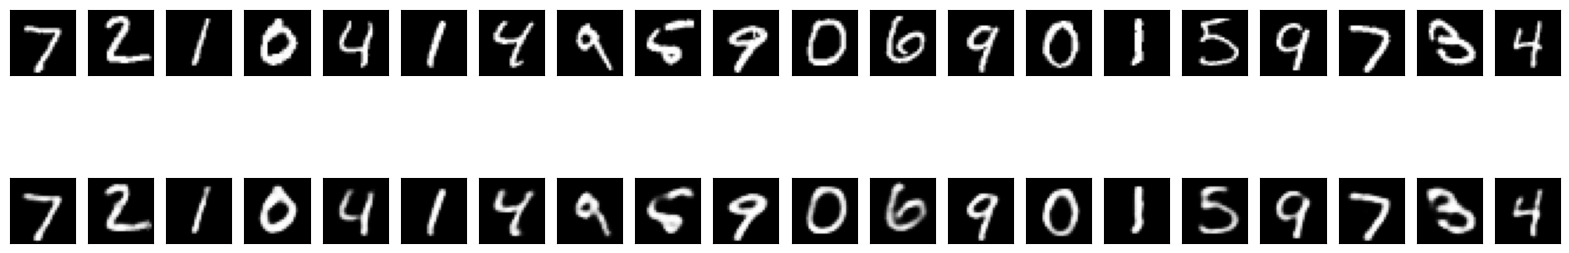

In [ ]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Denoising autoencoder

In [ ]:
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Input after adding noise

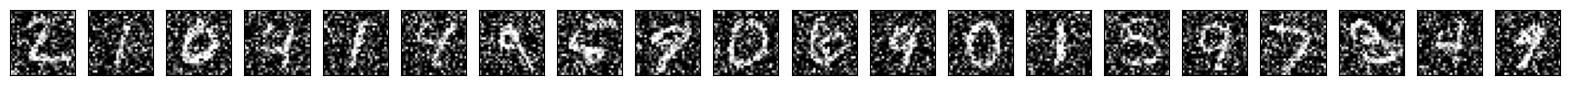

In [ ]:
n = 20
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Encoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation="relu")(input_img)
encoded = layers.Dense(64, activation="relu")(encoded)
encoded = layers.Dense(32, activation="relu")(encoded)

Decoder

In [ ]:
decoded= layers.Dense(64, activation="relu")(encoded)
decoded = layers.Dense(128, activation="relu")(decoded)
decoded = layers.Dense(784, activation="sigmoid")(decoded)

Declaring model

In [ ]:
autoencoder1 = keras.Model(input_img, decoded)
autoencoder1.compile(optimizer="adam", loss="binary_crossentropy")

Training model

In [ ]:
autoencoder1.fit(x_train_noisy, X_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, X_test))

Epoch 1/100
469/469 [==============================] - 8s 14ms/step - loss: 0.2280 - val_loss: 0.1737
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1657 - val_loss: 0.1566
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1539 - val_loss: 0.1491
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1478 - val_loss: 0.1439
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1425 - val_loss: 0.1394
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1380 - val_loss: 0.1356
Epoch 7/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1340 - val_loss: 0.1316
Epoch 8/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1311 - val_loss: 0.1296
Epoch 9/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1291 - val_loss: 0.1286
Epoch 10/100
469/469 [==============================] - 6s 14ms/step - loss: 0.127

Making Predictions

In [ ]:
decode_images_noise = autoencoder1.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


Ouput after denoising

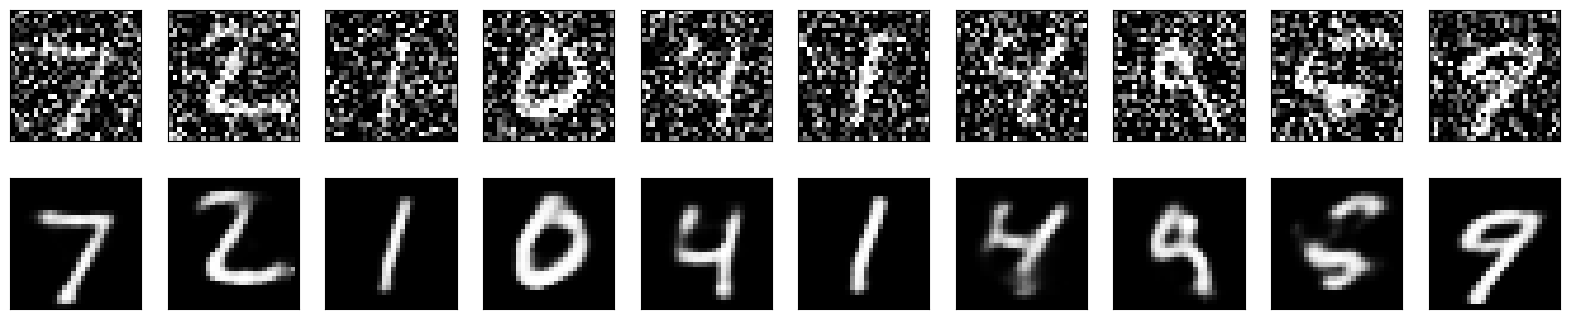

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decode_images_noise[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()